In [1]:
%matplotlib inline
import os
from os.path import join as oj
import sys, time
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
save_path = "../results_for_export"
trained_model_folder = '../models/ColorMNIST'
trained_model_folder = '../models/DecoyMNIST'
fnames = [oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder)]
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 
results = pd.concat(results_list, axis=1).T.infer_objects() 

In [9]:
results['final_acc'] = [x[-1] for x in results['accs_test']] 
results['final_acc_train'] = [x[-1] for x in results['accs_train']]
results['final_cd'] = [x[-1] for x in results['cd']]
results['final_test_loss'] = [min(x) for x in results['losses_test']]
results['final_train_loss'] = [min(x) for x in results['losses_train']]


In [10]:
results.reset_index(drop=True, inplace=True)
results_save = results[['regularizer_rate','final_acc','final_acc_train','final_test_loss', 'final_cd', 'method', 'dataset', ]].sort_values(by = ['regularizer_rate'])

In [11]:
concise_results = results_save.groupby(by = ['dataset', 'method','regularizer_rate']).mean()
concise_results.columns = ['Test accuracy', 'Train accuracy', 'Test loss' , 'CD',]
concise_results

Test accuracy  Train accuracy  \
dataset method       regularizer_rate                                  
Decoy   CDEP         1.0                   72.951667       99.218750   
                     10.0                  76.933333       99.479167   
                     100.0                 95.711667       99.479167   
                     1000.0                97.235000       96.354167   
                     10000.0               96.688333       95.312500   
        ExpectedGrad 0.0                   60.970000       98.437500   
                     0.1                   97.766667       95.833333   
                     1.0                   93.830000       92.968750   
                     10.0                  43.160000       15.625000   
                     100.0                 10.090000        4.687500   
                     1000.0                10.090000        4.687500   
                     100000.0              10.090000        4.687500   
        Grad         1.0                   56.930000       99.479167   
                     10.0                  63.996667       98.958333   
                     100.0                 92.418333       99.218750   
                     1000.0                98.893333       99.218750   
                     10000.0               98.941667       98.958333   

                                       Test loss            CD  
dataset method       regularizer_rate                           
Decoy   CDEP         1.0                0.016125  9.804710e-05  
                     10.0               0.018697  8.109030e-06  
                     100.0              0.026351  2.279291e-06  
                     1000.0             0.056451  4.606398e-07  
                     10000.0            0.112337  4.433080e-10  
        ExpectedGrad 0.0                0.014812  0.000000e+00  
                     0.1                0.076895  4.478373e-01  
                     1.0                0.198990  1.363685e-01  
                     10.0               1.707936  3.754114e-02  
                     100.0              6.615262  2.693682e-03  
                     1000.0            11.752677  5.038153e-04  
                     100000.0          16.698810  7.962180e-06  
        Grad         1.0                0.014632  2.704329e-04  
                     10.0               0.017466  2.940941e-04  
                     100.0              0.025363  1.609804e-05  
                     1000.0             0.030583  4.679974e-07  
                     10000.0            0.031472  3.383700e-07

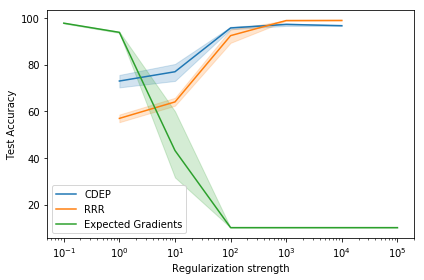

In [12]:
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'CDEP'],label="CDEP",legend = "brief"  );
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'Grad'], label="RRR" );
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'ExpectedGrad'], label="Expected Gradients");
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'EGradients'], label="Expected Gradients");
plot.set(xscale="log")
plot.set_xlabel("Regularization strength")
plot.set_ylabel("Test Accuracy")
plot.set_title("");
fig  = plot.get_figure()
fig.tight_layout()
# fig.savefig(oj(save_path,"ColorMNIST_results"))
plt.show()